In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('./Data/application_record.csv')


In [5]:
df.shape

(438557, 18)

In [6]:
df.info

<bound method DataFrame.info of              ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  

In [7]:
df.describe

<bound method NDFrame.describe of              ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE

In [10]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


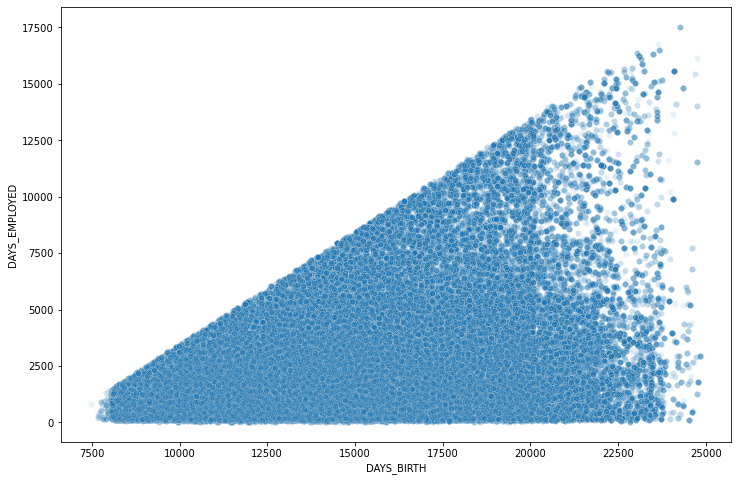

In [20]:
#remove warnings 
import warnings
warnings.simplefilter('ignore')

# REMOVE UNEMPLOYED PEOPLE
plt.figure(figsize=(12,8))
employed = df[df['DAYS_EMPLOYED']<0]

# MAKE BOTH POSITIVE
employed['DAYS_EMPLOYED'] = -1*employed['DAYS_EMPLOYED']
employed['DAYS_BIRTH'] = -1*employed['DAYS_BIRTH']

# With so many points, alpha is tiny, might be an indicated that a 
# scatterplot may not be the right choice!
sns.scatterplot(y='DAYS_EMPLOYED',x='DAYS_BIRTH',data=employed, alpha=0.1);

# plt.savefig('task_one.jpg')

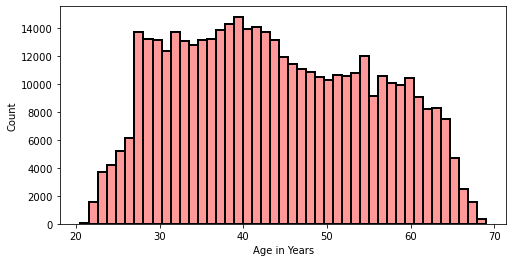

In [30]:
plt.figure(figsize=(8,4))

df['YEARS'] = -1*df['DAYS_BIRTH']/365
sns.histplot(data=df,x='YEARS',edgecolor='black',
             color='red',bins=45,alpha=0.4,linewidth=2)
plt.xlabel("Age in Years")
plt.savefig('DistPlot_solution.png')

Text(0.5, 1.0, 'Income Totals per Family Status for Bottom Half of Earners')

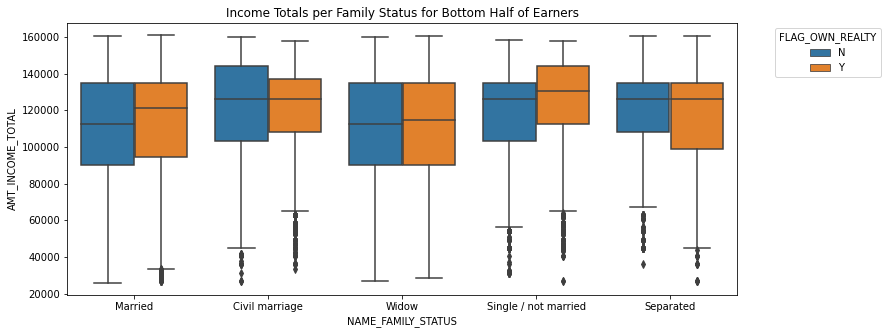

In [42]:
plt.figure(figsize=(12,5))
bottom_half_income = df.nsmallest(n=int(0.5*len(df)),columns='AMT_INCOME_TOTAL')
sns.boxplot(x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',data=bottom_half_income,hue='FLAG_OWN_REALTY')
plt.legend(title='FLAG_OWN_REALTY',bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Income Totals per Family Status for Bottom Half of Earners')


In [43]:
df.corr()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000,-0.306179


<AxesSubplot:>

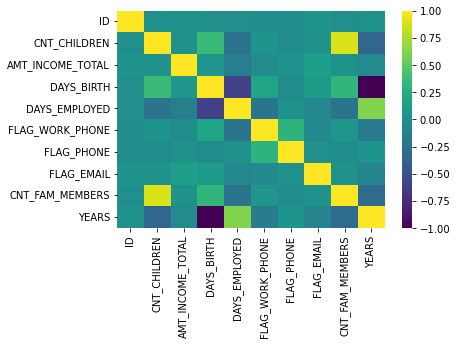

In [44]:
sns.heatmap(df.drop('FLAG_MOBIL',axis=1).corr(),cmap="viridis")